<a href="https://colab.research.google.com/github/yuvan-s-96/LGMVIP-DataScience-Task-02/blob/main/Image_to_sketch_convertor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
plt.rcParams['figure.figsize'] = (12, 6)

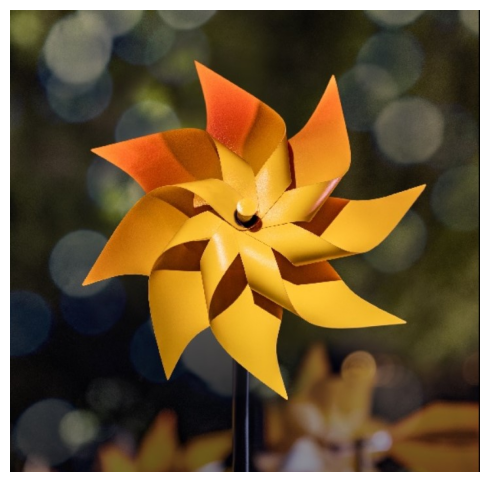

In [ ]:
# load the image
img = cv2.imread('/content/edgeflower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img)

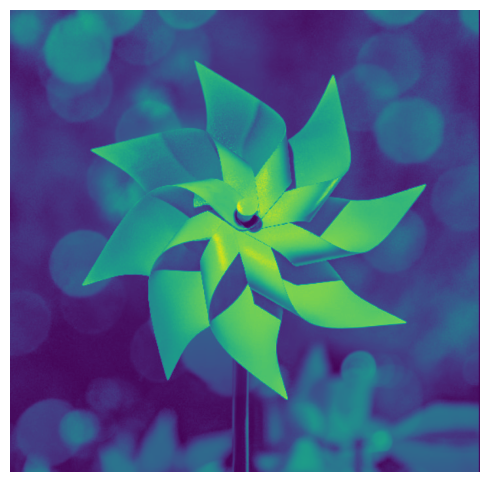

In [ ]:
image = cv2.imread("edgeflower.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(gray_image)

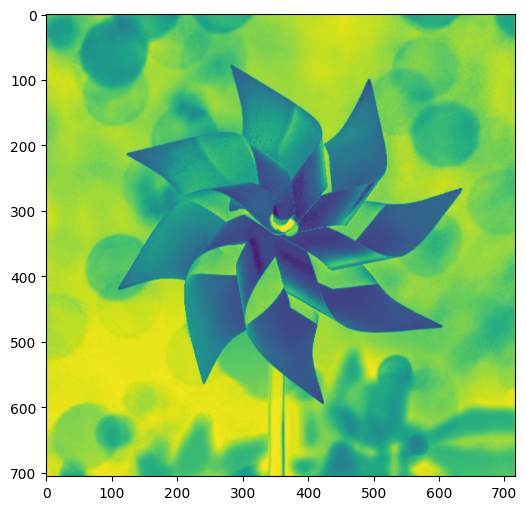

In [ ]:
inverted_image = 500 - gray_image
plt.imshow(inverted_image)



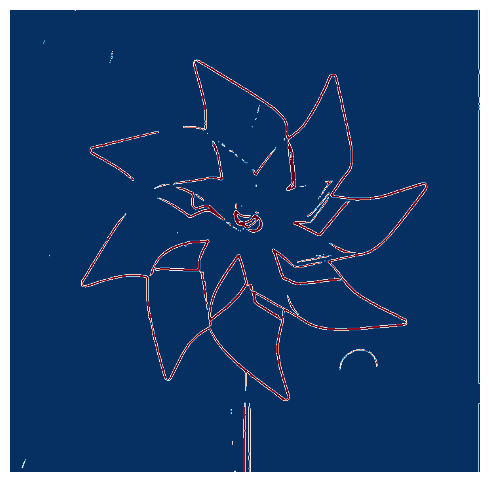

In [ ]:
# edge mask generation
line_size = 7
blur_value = 7

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur_value)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)


plt.axis("off")
plt.imshow(edges, cmap='RdBu')


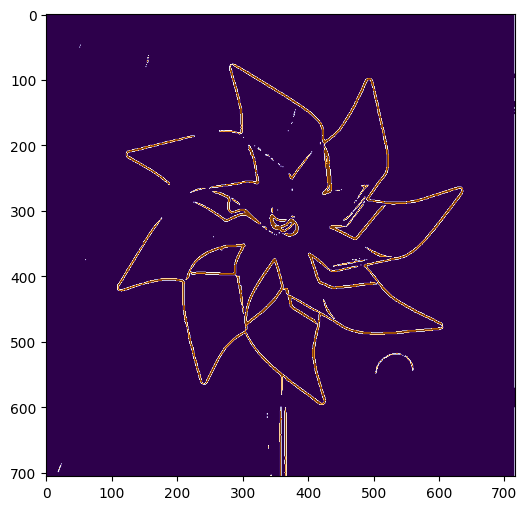

In [ ]:
plt.imshow(edges, cmap='PuOr')

In [ ]:
# Color quantization with KMeans clustering
from sklearn.cluster import KMeans

k = 7
data = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


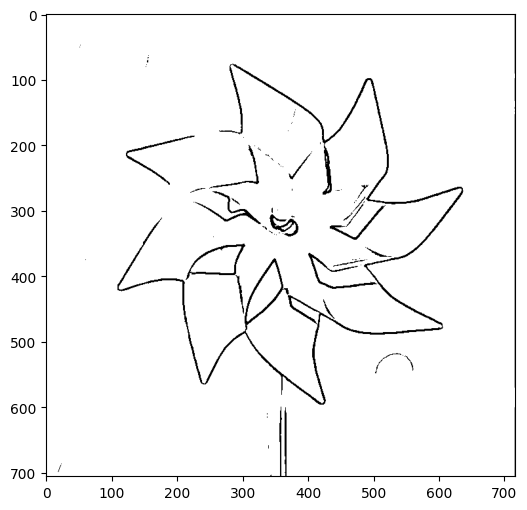

In [ ]:
plt.imshow(edges, cmap='gray')

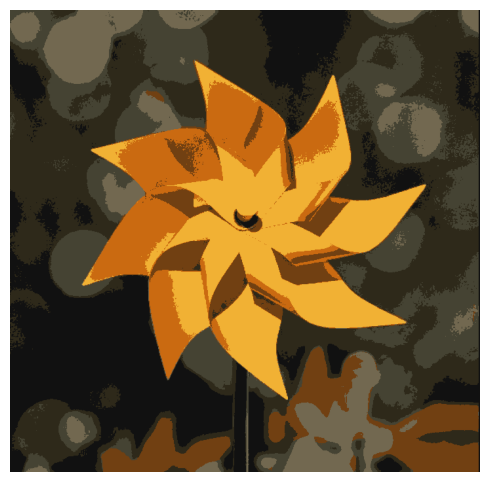

In [ ]:
img_reduced = img_reduced.astype(np.uint8)

plt.axis("off")
plt.imshow(img_reduced)

In [ ]:
# Bilateral Filter

blurred = cv2.bilateralFilter(img_reduced, d=7, sigmaColor=200,sigmaSpace=200)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

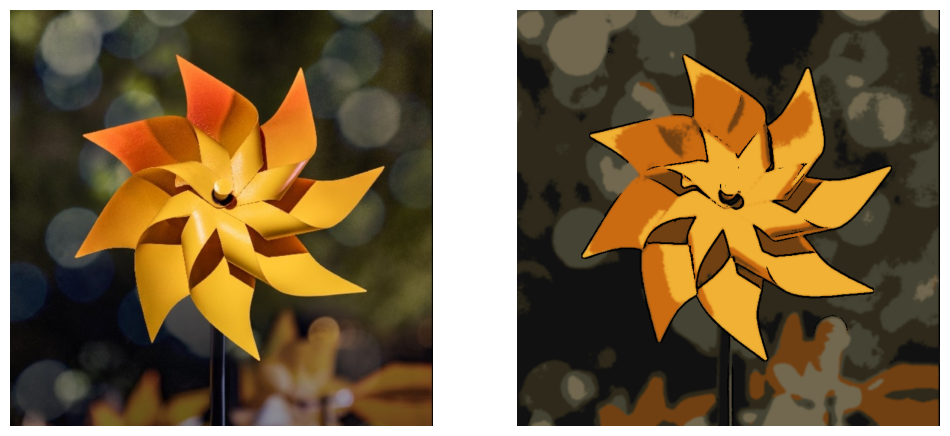

In [ ]:
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(cartoon)

In [ ]:
# export cartoon to a jpg file
cartoon_ = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite('cartoon.png', cartoon_)

True

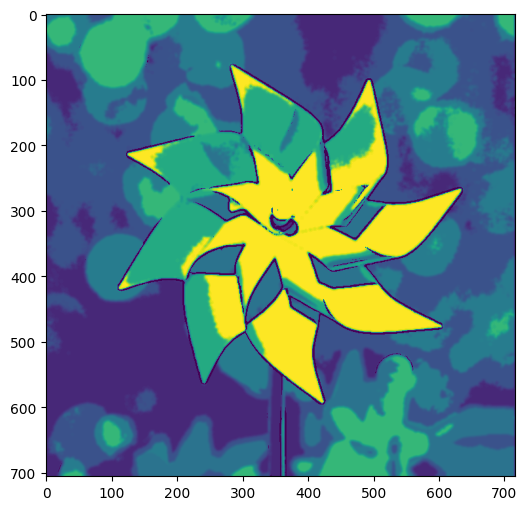

In [ ]:
gray_img = cv2.cvtColor(cartoon, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

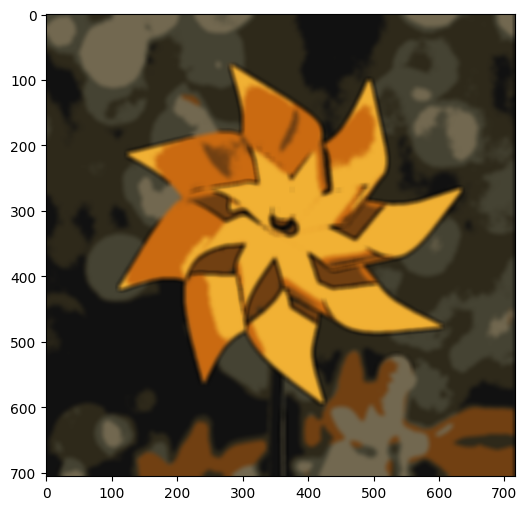

In [ ]:
figure_size = 9
new_image = cv2.blur(cartoon,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.imshow(new_image)

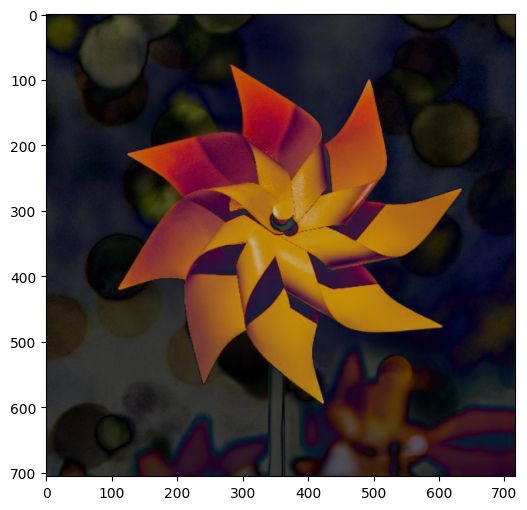

In [ ]:
def bright(img, beta_value ):
    img_bright = cv2.convertScaleAbs(img, beta=beta_value)
    return img_bright
a3 = bright(img, -60)
plt.imshow( a3)

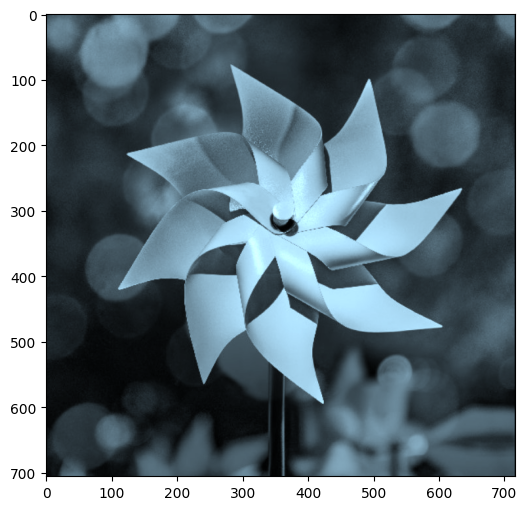

In [ ]:
def sepia(img):
    img_sepia = np.array(img, dtype=np.float64) # converting to float to prevent loss
    img_sepia = cv2.transform(img_sepia, np.matrix([[0.272, 0.534, 0.131],
                                    [0.349, 0.686, 0.168],
                                    [0.393, 0.769, 0.189]])) # multipying image with special sepia matrix
    img_sepia[np.where(img_sepia > 255)] = 255 # normalizing values greater than 255 to 255
    img_sepia = np.array(img_sepia, dtype=np.uint8)
    return img_sepia
a2 = sepia(img)
plt.imshow(a2)

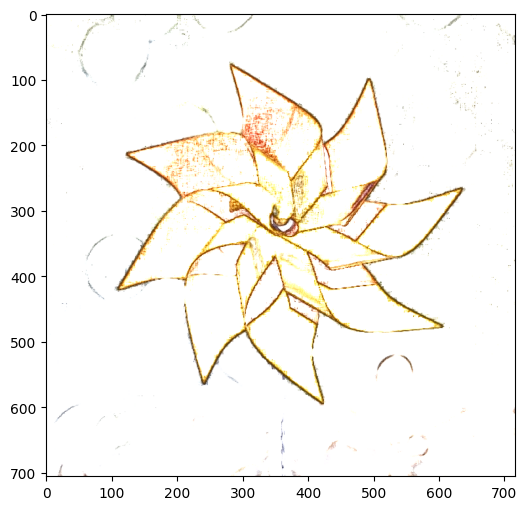

In [ ]:
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1)
    return  sk_color
a6 = pencil_sketch_col(img)
plt.imshow(a6)

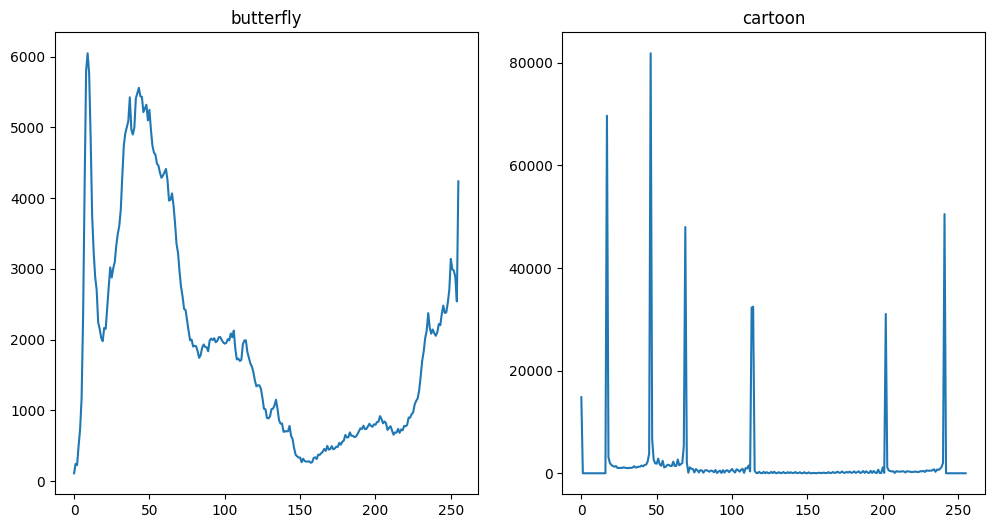

In [ ]:
histr1 = cv2.calcHist([cartoon],[0],None,[256],[0,256])
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(1, 2, 1)
plt.title('butterfly')
plt.plot(histr)
plt.subplot(1, 2, 2)
plt.title('cartoon')
plt.plot(histr1)
plt.show()